# Forest Cover Machine Hack

### Sravan VG

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

C:\ProgramData\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.preprocessing import normalize

In [4]:
set_plot_sizes(12,14,16)

## Load in our data from last lesson

In [5]:
PATH = ".."
# import feather
# df_raw = feather.read_dataframe('tmp')

In [6]:
na_val = []
df_train = pd.read_csv(f'{PATH}\Train.csv', low_memory=False,na_values = na_val)
df_test = pd.read_csv(f'{PATH}\Test.csv', low_memory=False,na_values = na_val)

In [7]:
len(df_train)

29050

In [8]:
df_train.describe()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,...,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,2959.328330,155.720241,14.028537,269.220792,46.332737,2346.340241,212.042134,223.446850,142.854630,1971.574871,...,0.091738,0.078967,0.002719,0.003064,0.000207,0.000379,0.027539,0.023821,0.014561,5.536110
std,277.578227,112.109417,7.458200,212.406921,58.938186,1558.148732,26.678889,19.610671,38.000582,1321.145310,...,0.288661,0.269692,0.052078,0.055267,0.014370,0.019456,0.163650,0.152494,0.119790,1.438261
min,1879.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,58.000000,63.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,120.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2995.000000,128.000000,13.000000,218.000000,29.000000,1984.000000,218.000000,226.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,3161.000000,262.000000,18.000000,390.000000,69.000000,3329.750000,231.000000,237.000000,168.000000,2536.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,3844.000000,360.000000,61.000000,1320.000000,589.000000,7087.000000,254.000000,254.000000,251.000000,7142.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df_raw_shuff = df_train.sample(n = len(df_train))

In [10]:
df_train = df_raw_shuff
# display_all(df_raw_shuff[-200:])

In [11]:
df_train.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

In [12]:
df_train.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
12243,2492,144,4,30,-11,1736,226,239,147,499,...,0,0,0,0,0,0,0,0,0,3
2440,2532,351,8,408,159,957,206,227,159,1366,...,0,0,0,0,0,0,0,0,0,6
25443,2951,37,5,0,0,4734,220,229,146,1226,...,0,0,0,0,0,0,0,0,0,5
18108,2744,84,2,390,76,1761,222,235,149,1846,...,0,0,0,0,0,0,0,0,0,5
6650,2864,20,12,67,10,2717,212,215,139,2380,...,0,0,0,0,0,0,0,0,0,7


## Feature Analysis and extraction

In [13]:
cols_to_normalize = ['Aspect(degrees)','Slope(degrees)','Horizontal_Distance_To_Hydrology(meters)','Vertical_Distance_To_Hydrology(meters)',
  'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points(meters)']

df_train[cols_to_normalize] = normalize(df_train[cols_to_normalize])
df_test[cols_to_normalize] = normalize(df_test[cols_to_normalize])


feature_cols = [col for col in df_train.columns if col not in ['Cover_Type','Id']]
feature_cols.append('binned_elevation')
feature_cols.append('Horizontal_Distance_To_Roadways_Log')
feature_cols.append('Soil_Type12_32')
feature_cols.append('Soil_Type23_22_32_33')


df_train['binned_elevation'] = [math.floor(v/50.0) for v in df_train['Elevation(meters)']]
df_test['binned_elevation'] = [math.floor(v/50.0) for v in df_test['Elevation(meters)']]

df_train['Horizontal_Distance_To_Roadways_Log'] = [math.log(v+1) for v in df_train['Horizontal_Distance_To_Roadways(meters)']]
df_test['Horizontal_Distance_To_Roadways_Log'] = [math.log(v+1) for v in df_test['Horizontal_Distance_To_Roadways(meters)']]

df_train['Soil_Type12_32'] = df_train['Soil_Type_32'] + df_train['Soil_Type_12']
df_test['Soil_Type12_32'] = df_test['Soil_Type_32'] + df_test['Soil_Type_12']
df_train['Soil_Type23_22_32_33'] = df_train['Soil_Type_23'] + df_train['Soil_Type_22'] + df_train['Soil_Type_32'] + df_train['Soil_Type_33']
df_test['Soil_Type23_22_32_33'] = df_test['Soil_Type_23'] + df_test['Soil_Type_22'] + df_test['Soil_Type_32'] + df_test['Soil_Type_33']

In [14]:
df_train.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

### Some More feature extraction

In [15]:
def add_feature(data):   
    data['Ele_minus_VDtHyd'] = data['Elevation(meters)']-data['Vertical_Distance_To_Hydrology(meters)']
    data['Ele_plus_VDtHyd'] = data['Elevation(meters)']+data['Vertical_Distance_To_Hydrology(meters)']
    data['Distanse_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology(meters)']**2+data['Vertical_Distance_To_Hydrology(meters)']**2)**0.5
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology(meters)']+data['Horizontal_Distance_To_Fire_Points(meters)']
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology(meters)']-data['Horizontal_Distance_To_Fire_Points(meters)']
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology(meters)']+data['Horizontal_Distance_To_Roadways(meters)']
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology(meters)']-data['Horizontal_Distance_To_Roadways(meters)']
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points(meters)']+data['Horizontal_Distance_To_Roadways(meters)']
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points(meters)']-data['Horizontal_Distance_To_Roadways(meters)']
    return data

In [16]:
df_train['Hillshade_3pm']

12243    0.232259
2440     0.104837
25443    0.114475
18108    0.077468
6650     0.057816
           ...   
7842     0.247512
24904    0.253573
14854    0.059994
21300    0.144090
17953    0.054028
Name: Hillshade_3pm, Length: 29050, dtype: float64

In [19]:
add_feature(df_train);
add_feature(df_test);

In [20]:
train_cats(df_train)
df_trn, y_trn, nas = proc_df(df_train, 'Cover_Type')
df_trn.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

In [21]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 300
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_train, n_trn)

In [22]:
y_train

array([5, 6, 7, ..., 5, 5, 6], dtype=int64)

In [23]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def logloss(x, y):
    y2 = []
    for ys in y:
        y1 = [0,0,0,0,0,0,0]
        y1[ys-1] = 1
        y2.append(y1)
    
#     print(len(y2[0]), x.shape)
    y2 = np.array(y2)
    return sklearn.metrics.log_loss(y2, x)
    

def print_score(m):
    res = [logloss(m.predict_proba(X_train), y_train), logloss(m.predict_proba(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [24]:
df_trn[:20]

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type23_22_32_33,Ele_minus_VDtHyd,Ele_plus_VDtHyd,Distanse_to_Hydrolody,Hydro_plus_Fire,Hydro_minus_Fire,Hydro_plus_Road,Hydro_minus_Road,Fire_plus_Road,Fire_minus_Road
50118,2785,0.024883,0.002890,0.038850,0.018943,3090,0.038208,0.038208,0.019586,0.997096,...,0,2784.981057,2785.018943,0.043222,1.035946,-0.958246,3090.038850,-3089.961150,3090.997096,-3089.002904
338704,2265,0.001528,0.036667,0.165003,0.091668,570,0.271949,0.285699,0.215420,0.872375,...,0,2264.908332,2265.091668,0.188756,1.037378,-0.707372,570.165003,-569.834997,570.872375,-569.127625
471322,3348,0.064866,0.006986,0.216054,0.031435,1761,0.121250,0.115262,0.056883,0.957525,...,0,3347.968565,3348.031435,0.218329,1.173579,-0.741470,1761.216054,-1760.783946,1761.957525,-1760.042475
9762,3375,0.052362,0.008813,0.333874,0.108353,1771,0.127536,0.111464,0.047696,0.918152,...,0,3374.891647,3375.108353,0.351016,1.252026,-0.584279,1771.333874,-1770.666126,1771.918152,-1770.081848
199823,2756,0.000526,0.015792,0.094751,0.017897,1142,0.086329,0.090013,0.070010,0.984884,...,0,2755.982103,2756.017897,0.096426,1.079635,-0.890133,1142.094751,-1141.905249,1142.984884,-1141.015116
293495,3123,0.263498,0.005972,0.230654,0.020901,1445,0.154516,0.169445,0.117939,0.900222,...,0,3122.979099,3123.020901,0.231599,1.130875,-0.669568,1445.230654,-1444.769346,1445.900222,-1444.099778
118588,2959,0.151876,0.004821,0.253127,0.018804,5325,0.093054,0.111858,0.085822,0.940185,...,0,2958.981196,2959.018804,0.253824,1.193311,-0.687058,5325.253127,-5324.746873,5325.940185,-5324.059815
81154,2725,0.005477,0.002577,0.061853,0.011920,1449,0.068940,0.071840,0.047034,0.991902,...,0,2724.988080,2725.011920,0.062991,1.053755,-0.930049,1449.061853,-1448.938147,1449.991902,-1448.008098
172300,3134,0.056193,0.000624,0.026223,0.000000,4014,0.137360,0.147975,0.095528,0.972761,...,1,3134.000000,3134.000000,0.026223,0.998985,-0.946538,4014.026223,-4013.973777,4014.972761,-4013.027239
18948,3297,0.083211,0.012744,0.410057,0.104951,1154,0.185163,0.164922,0.071966,0.864343,...,0,3296.895049,3297.104951,0.423274,1.274400,-0.454286,1154.410057,-1153.589943,1154.864343,-1153.135657


# Random Forest

In [25]:
# set_rf_samples(50000)
# reset_rf_samples()

In [26]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14066132249379418, 0.29434218928501793, 0.9858793969849247, 0.9166666666666666, 0.8957621440536013]


In [39]:
m.predict_proba(X_train)
# df_trn.iloc[1]

array([[0.     , 0.     , 0.002  , ..., 0.     , 0.     , 0.     ],
       [0.10243, 0.     , 0.     , ..., 0.05212, 0.     , 0.84545],
       [0.     , 0.     , 0.38578, ..., 0.05343, 0.56079, 0.     ],
       ...,
       [0.00417, 0.     , 0.     , ..., 0.0625 , 0.     , 0.93333],
       [0.     , 0.07562, 0.01612, ..., 0.85446, 0.01495, 0.03885],
       [0.9406 , 0.     , 0.     , ..., 0.     , 0.     , 0.0594 ]])

In [48]:
y_trn[1:3]

array([7, 5], dtype=int64)

In [85]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 182 ms


(4.64, 0.9329523031752479)

# Feature importance

It's not normally enough to just to know that a model can make accurate predictions - we also want to know *how* it's making predictions. The most important way to see this is with *feature importance*.

In [29]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
58,Ele_minus_VDtHyd,0.205203
59,Ele_plus_VDtHyd,0.112898
6,Hillshade_9am,0.051805
7,Hillshade_Noon,0.045138
1,Aspect(degrees),0.044627
61,Hydro_plus_Fire,0.042203
4,Vertical_Distance_To_Hydrology(meters),0.039369
0,Elevation(meters),0.039153
2,Slope(degrees),0.037928
8,Hillshade_3pm,0.033737


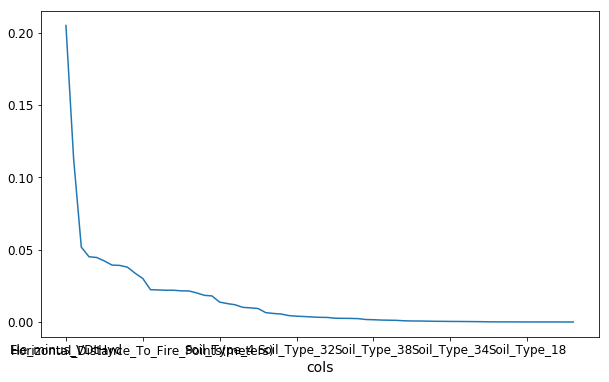

In [30]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [53]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

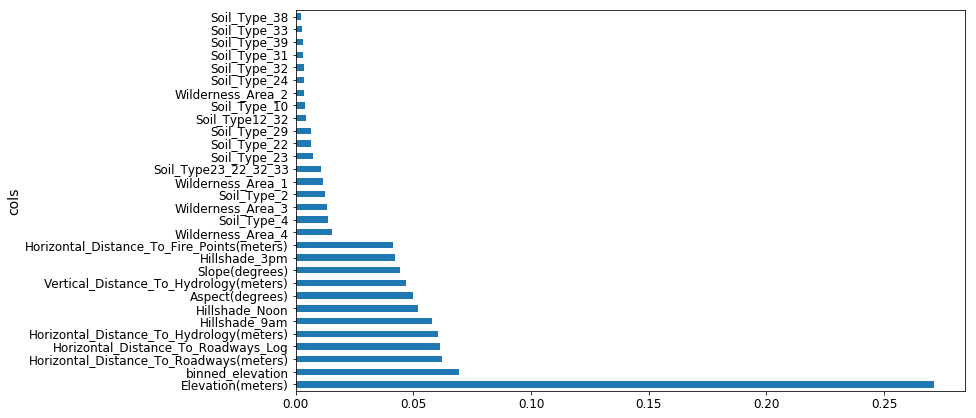

In [54]:
plot_fi(fi[:30]);

In [55]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
# display_all(df_raw.describe(include='all').T)

In [109]:
X_train.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
parameters = {'n_estimators':[600,700,800,1000,],'min_samples_leaf':[1], 'max_features':[0.7,1], 'n_jobs':[-1], 'oob_score':[True]}

In [154]:
mgrid = RandomForestRegressor()

In [155]:
m_grid = GridSearchCV(mgrid,
                        parameters,
                        n_jobs = -1,
                        verbose=True)

In [ ]:
m_grid.fit(X_train,
         y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [489]:
print(m_grid.best_score_)
print(m_grid.best_params_)
print(m_grid.best_estimator_)

0.2678135349345207
{'max_features': 0.8, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'oob_score': True}
RandomForestRegressor(max_features=0.8, n_estimators=700, n_jobs=-1,
                      oob_score=True)


### Test Data

In [28]:
train_cats(df_test)

dtest, ytest, nas1 = proc_df(df_test,na_dict = nas)

In [31]:
def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
def fix_columns( d, columns ):  

    add_missing_dummy_columns( d, columns )

    # make sure we have all the columns we need
    assert( set( columns ) - set( d.columns ) == set())

    extra_cols = set( d.columns ) - set( columns )
    if extra_cols:
        print ("extra columns:", extra_cols)

    d = d[ columns ]
    return d

In [32]:
dtest = fix_columns(dtest,X_train.columns );

In [33]:
dtest.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

In [48]:
ans = m.predict_proba(dtest)

ans


array([[0.     , 0.00199, 0.     , ..., 0.84852, 0.     , 0.14949],
       [0.95364, 0.     , 0.     , ..., 0.     , 0.     , 0.04636],
       [0.     , 0.12732, 0.10959, ..., 0.64404, 0.05562, 0.06246],
       ...,
       [0.     , 0.36713, 0.     , ..., 0.39795, 0.     , 0.23493],
       [0.     , 0.     , 0.     , ..., 0.52669, 0.     , 0.47331],
       [0.     , 0.01541, 0.00222, ..., 0.87272, 0.00193, 0.10772]])

# ExtraTrees

In [27]:
# Current best
et_best = ensemble.ExtraTreesClassifier(n_estimators=300,n_jobs=-1,random_state=0)
%time et_best.fit(X_train, y_train)
print_score(et_best)

Wall time: 13.7 s
[6.251366444784939e-15, 0.22839674729143397, 1.0, 0.9433333333333334]


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = {'n_estimators':[100,50,150,200,250,300],'min_samples_leaf':[1, 3], 'n_jobs':[-1], 'oob_score':[False]}

In [59]:
etgrid = ensemble.ExtraTreesClassifier()

In [60]:
et_grid = GridSearchCV(etgrid,
                        parameters,
                        n_jobs = -1,
                        verbose=True)

In [61]:
et_grid.fit(X_train,
         y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.6min finished


GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 50, 150, 200, 250, 300],
                         'n_jobs': [-1], 'oob_score': [False]},
             verbose=True)

In [ ]:
print(et_grid.best_score_)
print(et_grid.best_params_)
print(et_grid.best_estimator_)

In [34]:
ansreg = et_best.predict_proba(dtest)
ansreg

array([[0.     , 0.00333, 0.     , ..., 0.98667, 0.     , 0.01   ],
       [1.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.00667, 0.01667, ..., 0.88333, 0.00333, 0.09   ],
       ...,
       [0.     , 0.12333, 0.     , ..., 0.17333, 0.     , 0.70333],
       [0.     , 0.     , 0.     , ..., 0.28   , 0.     , 0.72   ],
       [0.     , 0.02   , 0.     , ..., 0.60667, 0.     , 0.37333]])

In [54]:
anss = ans*0.1+ansreg*0.9
anss


array([[0.     , 0.0002 , 0.     , ..., 0.98485, 0.     , 0.01495],
       [0.91886, 0.     , 0.     , ..., 0.     , 0.     , 0.08114],
       [0.     , 0.05773, 0.02446, ..., 0.7439 , 0.02356, 0.15025],
       ...,
       [0.     , 0.60821, 0.     , ..., 0.17479, 0.     , 0.21699],
       [0.0045 , 0.     , 0.     , ..., 0.46667, 0.     , 0.52883],
       [0.     , 0.01954, 0.00022, ..., 0.88377, 0.00019, 0.09627]])

In [35]:
ans_d = pd.DataFrame(ansreg, columns = ['1','2','3','4','5','6','7'])
# dtest.drop(to_drop2, axis=1,inplace=True)
# np.savetxt("final21.csv", ans, delimiter=",")
%time ans_d.to_excel("10.xlsx", index = False)  

Wall time: 2min 28s


## Extra work (not in final code)

In [54]:
df_train

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,binned_elevation,Horizontal_Distance_To_Roadways_Log,Soil_Type12_32,Soil_Type23_22_32_33
15220,3268,0.145295,0.009686,0.051459,0.003027,3618,0.113815,0.152560,0.120474,0.961975,...,0,0,0,0,0,7,65,8.193953,1,1
12297,2684,0.020118,0.005158,0.061901,0.006706,2122,0.114002,0.111938,0.067060,0.982684,...,0,0,0,0,0,3,53,7.660585,0,0
1606,2795,0.025193,0.004263,0.151156,0.027518,2999,0.089143,0.084492,0.046510,0.979027,...,0,0,0,0,0,5,55,8.006368,1,0
22435,3364,0.123188,0.005133,0.611449,0.103940,3022,0.141153,0.158476,0.103298,0.737845,...,0,0,0,0,0,7,67,8.014005,0,1
26070,3206,0.022926,0.004791,0.105734,0.011634,3182,0.079728,0.072200,0.036613,0.987536,...,0,0,0,0,0,5,64,8.065579,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15855,3352,0.263427,0.035751,0.233321,-0.013171,2440,0.459115,0.434654,0.203215,0.658566,...,0,0,0,1,0,1,67,7.800163,0,0
16295,2459,0.508700,0.018240,0.192536,0.018240,895,0.407365,0.498566,0.370885,0.389125,...,0,0,0,0,0,3,49,6.797940,0,0
16196,2976,0.077197,0.012614,0.105957,0.046419,1565,0.121598,0.117057,0.052474,0.974299,...,0,0,0,0,0,5,59,7.356280,1,1
14689,3236,0.004593,0.006561,0.139101,0.000000,1355,0.136476,0.144350,0.097764,0.965177,...,0,0,0,0,0,7,64,7.212294,0,0


In [64]:
def largest_index(inlist):
    largest = -1
    largest_index = 0
    for i in range(len(inlist)):
        item = inlist[i]
        if item > largest:
            largest = item
            largest_index = i
    return largest_index
df_train_1_2 = df_train[(df_train['Cover_Type'] <= 2)]
df_train_3_4_6 = df_train[(df_train['Cover_Type'].isin([3,4,6]))]

X_train = df_train[feature_cols]
X_test = df_test[feature_cols]

X_train_1_2 = df_train_1_2[feature_cols]
X_train_3_4_6 = df_train_3_4_6[feature_cols]

y = df_train['Cover_Type']
y_1_2 = df_train_1_2['Cover_Type']
y_3_4_6 = df_train_3_4_6['Cover_Type']

# test_ids = df_test['Id']
# del df_train
# del df_test

clf = ensemble.ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
clf.fit(X_train, y)

clf_1_2 = ensemble.RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0)
clf_1_2.fit(X_train_1_2, y_1_2)

clf_3_4_6 = ensemble.RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0)
clf_3_4_6.fit(X_train_3_4_6, y_3_4_6)

# del X_train

vals_1_2 = {}
for e, val in enumerate(list(clf_1_2.predict_proba(X_test))):
    vals_1_2[e] = val
print(clf_1_2.classes_) 

vals_3_4_6 = {}
for e, val in enumerate(list(clf_3_4_6.predict_proba(X_test))):
    vals_3_4_6[e] = val 
print(clf_3_4_6.classes_)

vals = {}
for e, val in enumerate(list(clf.predict(X_test))):
    vals[e] = val 


# with open(loc_submission, "w") as outfile:
#     outfile.write("Id,Cover_Type\n")
ans_et = []
for e, val in enumerate(list(clf.predict_proba(X_test))):
    #boost types 1 and 2
    val[0] += vals_1_2[e][0]/1.3
    val[1] += vals_1_2[e][1]/1.1
    #boost types 3,4, and 6
    val[2] += vals_3_4_6[e][0]/3.4
    val[3] += vals_3_4_6[e][1]/4.0
    val[5] += vals_3_4_6[e][2]/3.6
#     val = val/sum(val)
    i = largest_index(val)
    v = i  + 1 
    val = [0,0,0,0,0,0,0]
    val[v-1] = 1
    ans_et.append(val)
      #val[4] += vals_5_7[e][0]/2.4
      #val[6] += vals_5_7[e][1]/3.4
#       i = largest_index(val)
#       v = i  + 1
#       outfile.write("%s,%s\n"%(test_ids[e],v))

[1 2]
[3 4 6]


In [59]:
ans_et

[array([0.0123 , 0.40076, 0.05912, 0.00057, 0.45682, 0.07043, 0.     ]),
 array([0.75488, 0.     , 0.04873, 0.00122, 0.     , 0.08798, 0.1072 ]),
 array([0.01232, 0.40154, 0.03662, 0.     , 0.39821, 0.11011, 0.04119]),
 array([0.01584, 0.46128, 0.04172, 0.     , 0.37975, 0.08769, 0.01373]),
 array([0.02396, 0.39346, 0.03502, 0.     , 0.11908, 0.09414, 0.33434]),
 array([0.02288, 0.389  , 0.06259, 0.00114, 0.20594, 0.06674, 0.2517 ]),
 array([0.0229 , 0.38932, 0.04782, 0.00115, 0.45802, 0.08079, 0.     ]),
 array([0.01759, 0.39501, 0.05919, 0.00286, 0.24241, 0.06797, 0.21497]),
 array([0.37028, 0.00442, 0.0808 , 0.00425, 0.     , 0.05402, 0.48622]),
 array([0.60436, 0.     , 0.03658, 0.00305, 0.     , 0.09754, 0.25848]),
 array([0.39184, 0.00221, 0.06726, 0.     , 0.03892, 0.07163, 0.42814]),
 array([0.02995, 0.38103, 0.07006, 0.00172, 0.43517, 0.05917, 0.0229 ]),
 array([0.12585, 0.27621, 0.01787, 0.00292, 0.34123, 0.10972, 0.12621]),
 array([0.36782, 0.00662, 0.09495, 0.     , 0.12136

In [61]:
ansreg[0][0]

0.0

In [65]:
ans_et

[[0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1,